In [1]:
import os
import glob

import numpy as np
import cv2
import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid

%matplotlib inline

FIGSIZE = (16, 8)

In [2]:
import helpers.calibration as calibration
import helpers.sobel as sobel
import helpers.color as color
import helpers.warp as warp
import helpers.line as line
import helpers.utils as utils

In [3]:
def display(images, cols=None, maxcols=10, width=FIGSIZE[0], titles=None, callback=None):
    if cols is None:
        cols = len(images)
    n_cols = cols if cols < maxcols else maxcols
    fig1 = plt.figure(1, (width, width * math.ceil(len(images)/n_cols)))
    grid1 = ImageGrid(fig1, 111,
                     nrows_ncols=(math.ceil(len(images)/n_cols), n_cols),
                     axes_pad=(0.1, 0.4),
                    )

    for index, img in enumerate(images):
        if titles is not None:
            grid1[index].set_title(titles[index])
        if len(img.shape) == 2:
            grid1[index].imshow(img, cmap='gray')
        else:
            grid1[index].imshow(img)
        if callback is not None:
            callback(grid1[index], index)

In [5]:
# find and load all camera calibration images
FOLDER = 'output_images/test_images_undistorted'
sample_files = os.listdir(FOLDER)
sample_files = list(map(lambda f: os.path.join(FOLDER, f), sample_files))
sample_images = np.array([ utils.load_image(f) for f in sample_files ])
print('There are {} sample images'.format(len(sample_images)))

There are 26 sample images


In [9]:
display(sample_images, cols=3, titles=['Test Image {}'.format(i) for i in range(len(sample_images))])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [10]:
subset = [2, 6, 7, 8, 9]

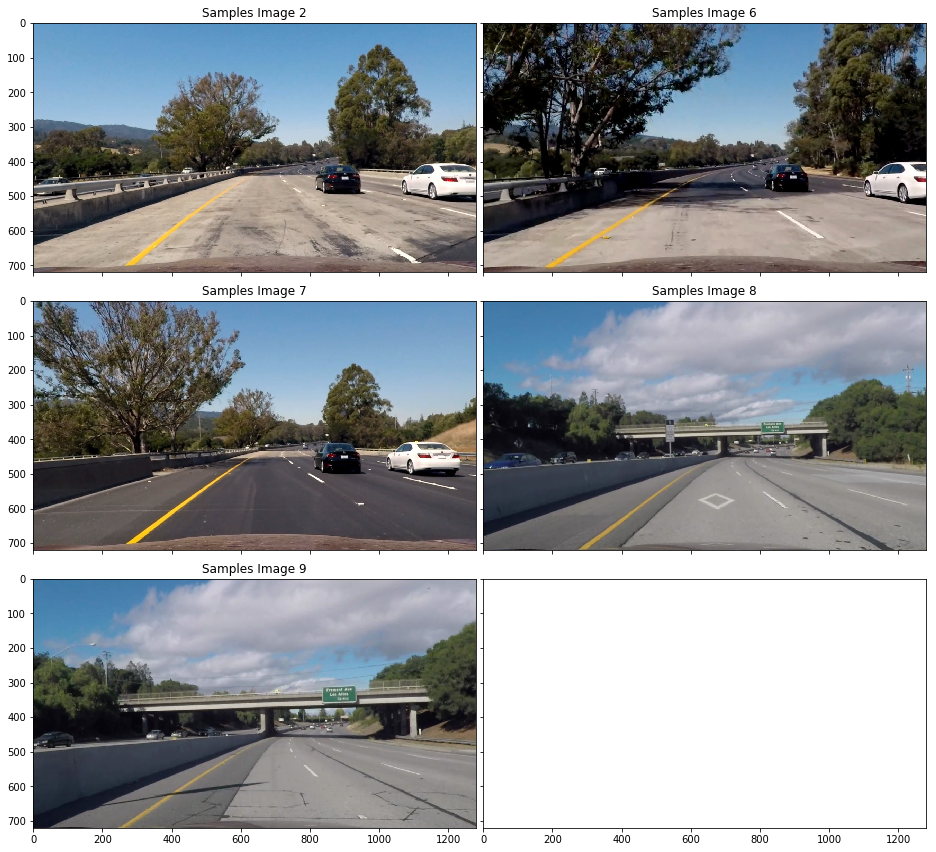

In [11]:
display(
    sample_images[subset],
    cols=2,
    titles=['Samples Image {}'.format(i) for i in subset]
)

In [ ]:
display(
    color.split_channels(sample_images[subset]),
    cols=3,
    titles=[
        'Test Image {0}, Channel {1}'.format(num, color)
        for num in subset
        for color in 'RGB'
    ]
)

In [ ]:
test_images_hls = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2HLS) for img in sample_images[subset]])

display(
    color.split_channels(test_images_hls),
    cols=3,
    titles=[
        'Test Image {0}, Channel {1}'.format(num, color)
        for num in subset
        for color in 'HLS'
    ]
)

In [ ]:
test_images_lab = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2Lab) for img in sample_images[subset]])

display(
    color.split_channels(test_images_lab),
    cols=3,
    titles=[
        'Test Image {0}, Channel {1}'.format(num, color)
        for num in subset
        for color in 'Lab'
    ]
)

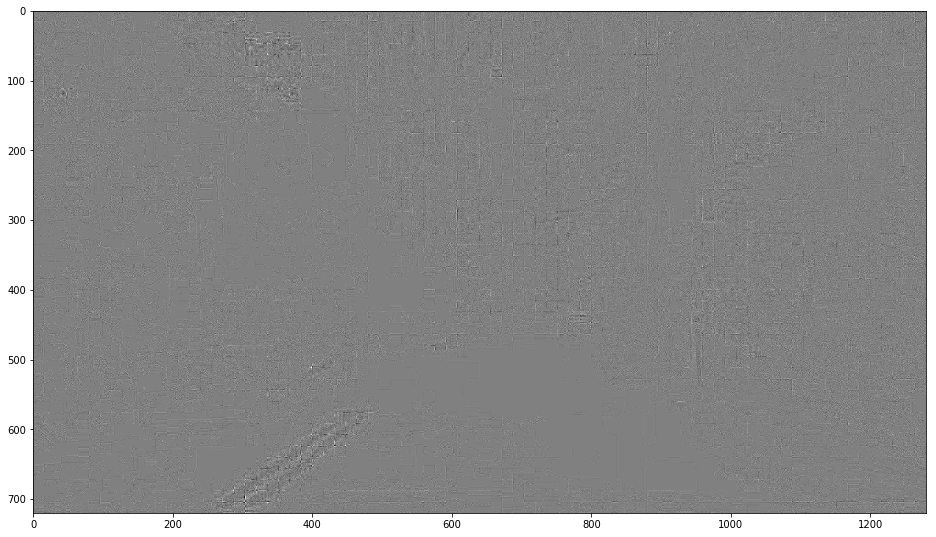

In [15]:
result = cv2.adaptiveThreshold(test_images_lab[4,...,0], 1,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 5, 1)
ret, result = cv2.threshold(cv2.GaussianBlur(test_images_hls[4,...,2],(5,5),0), 10, 105, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#display(np.array([result]))
#display(np.array([test_images_lab[4,...,0]]))
display(np.array([cv2.Laplacian(test_images_lab[4,...,2],cv2.CV_64F)]))